In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [57]:
def create_video(imgs,name_video,destination): #create video to see result, input : array of image, name video, folder to save
  video_name = destination +"/"+ name_video +'.avi'
  # images = [img for img in os.listdir(folder_img) if img.endswith(".jpg")]
  # frame = cv2.imread(os.path.join(folder_img, images[0]))
  images = imgs
  height, width= images[0].shape[0:2]

  video = cv2.VideoWriter(video_name, 0, 30, (width,height)) #frame per second
  for image in images:
      video.write(image)
  cv2.destroyAllWindows()
  video.release()

In [60]:
yuv_filename = 'D:/221_Semester/Image_Processing/Practice_code/data/akiyo_qcif.yuv' #path to yuv file
#flow=[]

width, height = 176,144 #follow source

file_size = os.path.getsize(yuv_filename) # lay kich thuoc cua mang video da ma hoa
n_frames = file_size // (width*height*3 // 2) # so luong frame | moi frame co 176*144*3//2 phan tu (vi chuan 420 4Y se lay 1 Cb va 1 Cr => size *1+(1/4)+(1/4))
f = open(yuv_filename, 'rb') #doc file
akiyo_rgb = [] #tao mang de luu anh yuv doc duoc
butter =[]
for j in range(1,n_frames+1) :
  butter.append(f.read(width*height*3//2)) #butter bao gom cac mang cua cac anh lan luot da duoc tac duoi dang bin
for i in range(0,n_frames) :
    yuv_raw = np.frombuffer(butter[i], dtype=np.uint8).reshape((height*3//2, width)) # chuyen tu bin sang so
    tmp = cv2.cvtColor(yuv_raw, cv2.COLOR_YUV2BGR_I420).astype(np.uint8)
    akiyo_rgb.append(tmp)
    # cv2.imwrite("D:/221_Semester/Image_Processing/Practice_code/data/akiyo_rgb_img/akiyo"+str(i)+".jpg",tmp.astype(np.uint8))

create_video(akiyo_rgb,"dtan","D:/221_Semester/Image_Processing/Practice_code/data/akiyo_video")
# yuv imgs consists of 300 frame of video

In [61]:
np.array(akiyo_rgb).shape

(300, 144, 176, 3)

In [62]:
(np.array(butter)).shape
#30000 pixel anh 100x100

(300,)

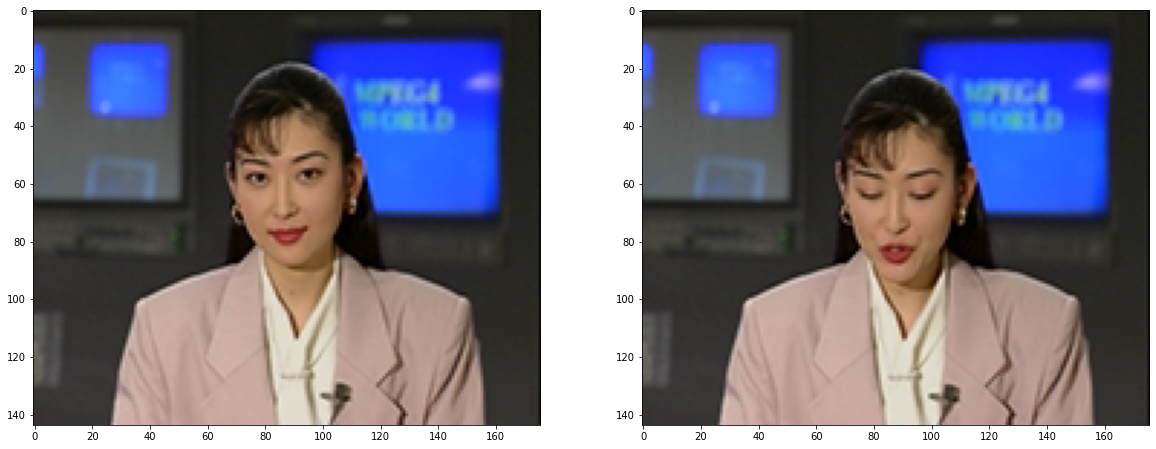

In [63]:
test1 = np.frombuffer(butter[0], dtype=np.uint8).reshape((height*3//2, width)) # test ve 2 frame khac nhau tu butter
test2 = np.frombuffer(butter[40], dtype=np.uint8).reshape((height*3//2, width))
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(test1, cv2.COLOR_YUV2RGB_I420))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(test2, cv2.COLOR_YUV2RGB_I420))